<h1 style="text-align: center;">Gradient Descent</h1>


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Loss Function
def mean_squared_error(y_true, y_predicted):
    
    MSE = np.sum((y_true-y_predicted)**2) / len(y_true)
    return MSE

In [9]:
# For visualisation
def graph(x, y, title):
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, '-o')
    plt.title(title)
    plt.xlabel('Values')
    plt.ylabel('Sum of Squared Residuals (SSR)')
    plt.show()

<h3 style="text-align: center;">Gradient Descent for a Linear Regression</h3>

$$
\hat{y} = a \cdot x + b
$$

$$
prediction = slope * input +  intercept
$$

In [10]:
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001):
    
    """
    We start with a random slope, an intercept and a value for the learning rate. Afterwards, we find the gradient of the 
    loss function(MSE, in this case):
    
    ▽MSE = < ∂MSE/∂a, ∂MSE/∂b >
    
    Then, we plug in the initial values and find the value of the derivatives for each variable a and b. The values multip-
    lied by the learning rate gives us the step size:
    
    Step size = value found * learning rate
    
    Then, we update the incumbent a and b values with the following:
    
    new a = old a - step size
    new b = old b - step size
    
    We keep iterating until:
    
    - We reach the maximum number of iterations
    - The step sizes are too small
    """
    
    # Initialize random numbers for the slope and the intercept
    incumbent_a = 0.1
    incumbent_b = 0.01
    n = float(len(x))
    iterations = iterations
    learning_rate = learning_rate
    
    # Create a lisst to keep track of the values
    MSEs = []
    slopes = []
    intercepts = []
    
    for i in range(iterations):
        
        y_predicted = incumbent_a * x + incumbent_b
        MSE = mean_squared_error(y, y_predicted)
        MSEs.append(MSE)
        slopes.append(incumbent_a)
        intercepts.append(incumbent_b)
        
        # Calculating the gradients for the Loss function
        # Partial derivate with respect to the slope
        slope_derivative = -(2/n) * sum(x * (y-y_predicted))
        # Partial derivate with respect to the intercept
        intercept_derivative = -(2/n) * sum(y-y_predicted)
    
        # Updating slope and intercepts
        incumbent_a = incumbent_a - (learning_rate * slope_derivative)
        incumbent_b = incumbent_b - (learning_rate * intercept_derivative)
        
    # Visualisation
    graph(slopes, MSEs, 'MSE vs Slopes')
    graph(intercepts, MSEs, 'MSE vs Intercepts')

        
    return incumbent_a, incumbent_b
    

In [11]:
X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
           55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
           45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
           48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
           78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
           55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
           60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])
 

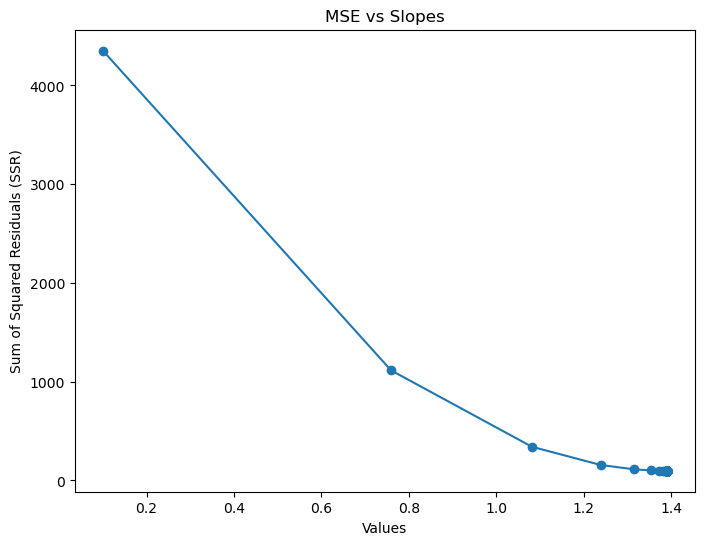

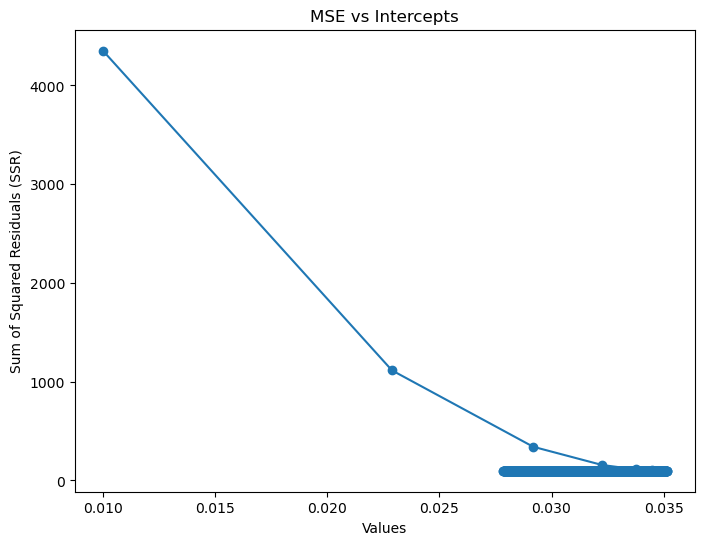

In [12]:
a, b = gradient_descent(X, Y)

In [13]:
a, b

(1.3898874156517447, 0.027837670512695246)

In [14]:
Y_predicted = a * X + b

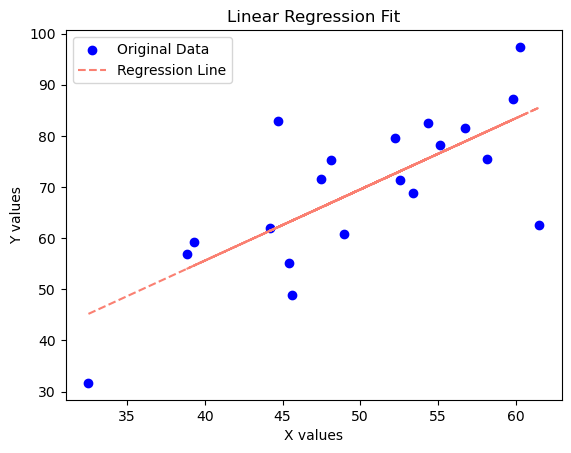

In [15]:
plt.scatter(X, Y, color='blue', label='Original Data')
plt.plot(X, Y_predicted, '--', color='salmon', label='Regression Line')
# Adding labels and title
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()